HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

<b><i>How will you help this NGO to make a correct decision based on socio-economic and health factors?</i></b>


<b>About Dataset</b>

<b>country</b> : Name of the country

<b>child_mort</b> : Death of children under 5 years of age per 1000 live births

<b>exports</b> : Exports of goods and services per capita. Given as %age of the GDP per capita

<b>health</b> : Total health spending per capita. Given as %age of GDP per capita

<b>imports</b> : Imports of goods and services per capita. Given as %age of the GDP per capita

<b>Income</b> : Net income per person

<b>Inflation</b> : The measurement of the annual growth rate of the Total GDP

<b>life_expec</b> : The average number of years a new born child would live if the current mortality patterns are to remain the same

<b>total_fer</b> : The number of children that would be born to each woman if the current age-fertility rates remain the same

<b>gdpp</b> : The GDP per capita. Calculated as the Total GDP divided by the total population

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading dataset
df1=pd.read_csv("Country-data.csv")

In [3]:
## first 5 lines
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<i>The dataset is not labelled.</i>

In [4]:
## Shape of the dataset
df1.shape

(167, 10)

<i>There are 167 rows and 10 columns.</i>

In [5]:
df1['country'].nunique()

167

<i>There are 167 unique countries , so each row is about a single country</i><br>
<i>We can also infer that there are no duplicates.</i>

In [6]:
## checking for null values
df1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<i>No null values.</i>

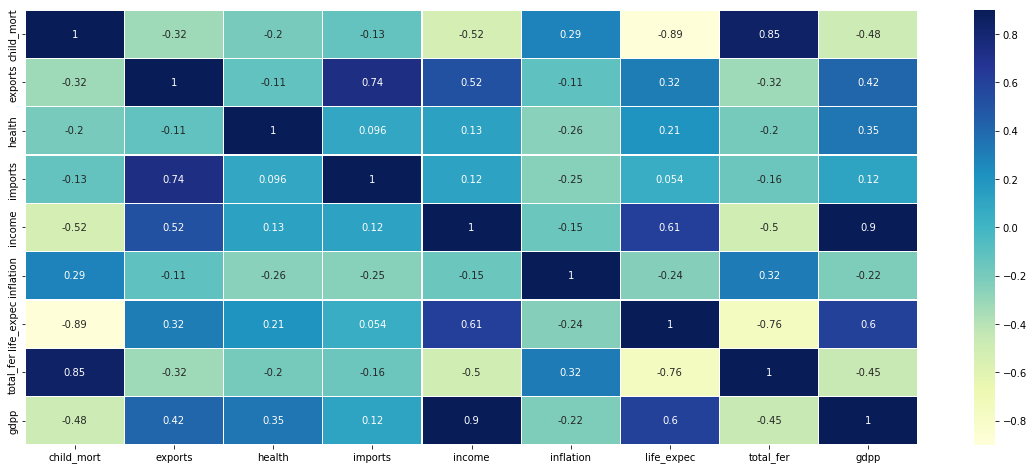

In [7]:
corr=df1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=-0.9,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

<i>
1. gdpp and income are highly positively correlated.<br>
2. life_expec and child_mort are highly negatively correlated.<br>
3. life_expec and total_fer are negatively correlated.<br>
4. total_fer and child_mort are positively correlated.<br>
</i>

In [8]:
## statistical summary
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
## checking datatypes
df1.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

<i>All datatypes are correctly matched.</i>

<Figure size 720x720 with 0 Axes>

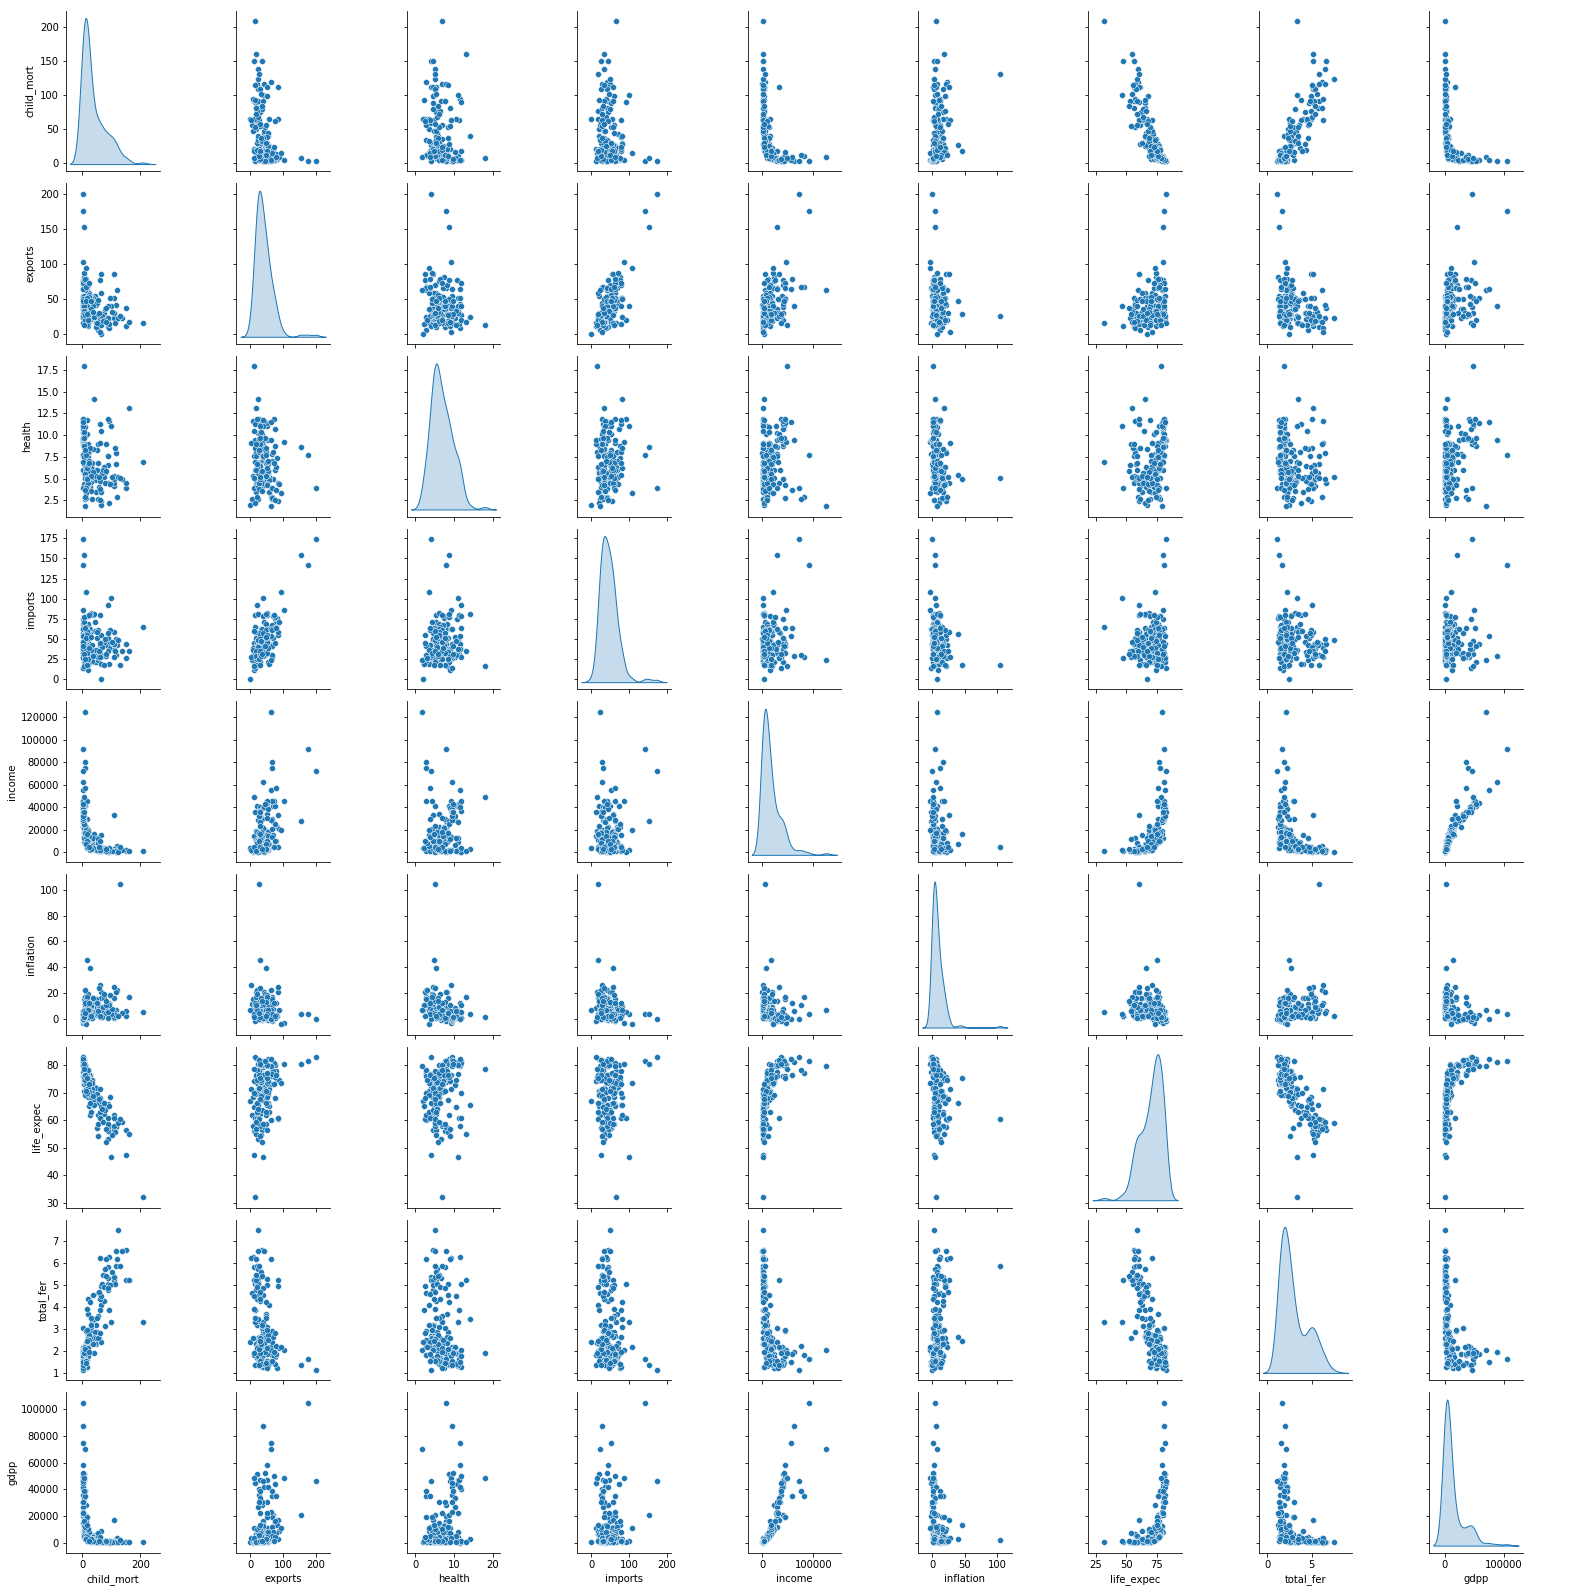

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(df1,diag_kind="kde")

<i>From the graph above we can see that data are not normally distributes.<br>
Also there isnt any clusters formation observed.</i>

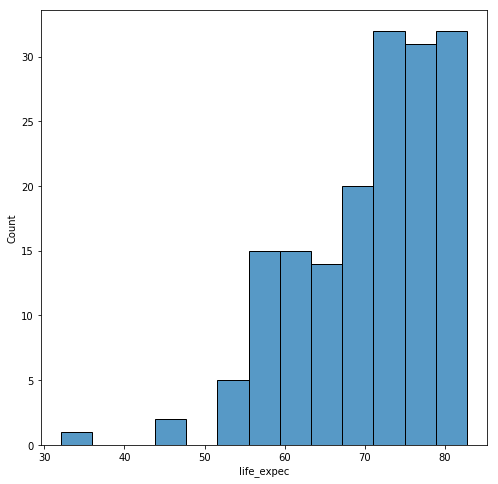

In [11]:
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x="life_expec")

<i>
1. Majority of the countries have life expectency of 70 and above<br>
2. Very few countries have life expectancy of 50 and below</i>

In [12]:
df1[df1['life_expec']<50]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170


<i> Central African Republic,Haiti,Lesotho are having the lowest life expectancy. All are in Africa.<br>
Also Haiti has the highest child mortality rate.</i>

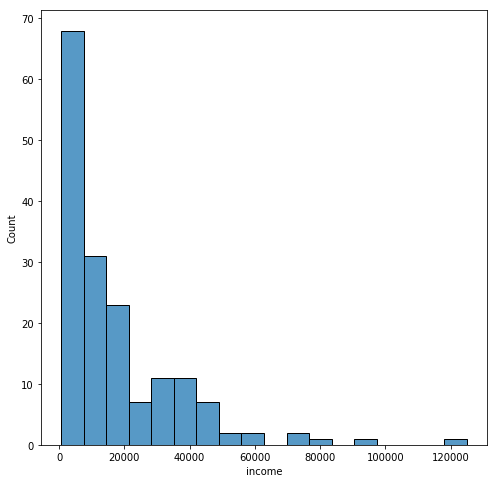

In [13]:
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x="income")

<i>Most countries are in between 0 to 20000 dollers income range.</i>

In [14]:
df1[df1['income']<1000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348


<i>All the above countries are in Africa.</i>

In [15]:
## removing the country column as it is object type
df2=df1.drop('country',axis=1)

In [16]:
## standard scaling the dataframe
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df2=std.fit_transform(df2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
## converting to dataframe
df2=pd.DataFrame(df2)

In [18]:
## dataframe after scaling 
df2.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [19]:
df2.describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [20]:
## PCA to reduce the number of features
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df2)
x_pca = pca.transform(df2)
x_pca.shape

(167, 2)

In [21]:
print(abs(pca.components_))

[[0.41951945 0.28389698 0.15083782 0.16148244 0.39844111 0.19317293
  0.42583938 0.40372896 0.39264482]
 [0.19288394 0.61316349 0.24308678 0.67182064 0.02253553 0.00840447
  0.22270674 0.15523311 0.0460224 ]]


In [22]:
## converting to dataframe
df3=pd.DataFrame(abs(pca.components_))

In [23]:
df4=df3.T

In [24]:
df1.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

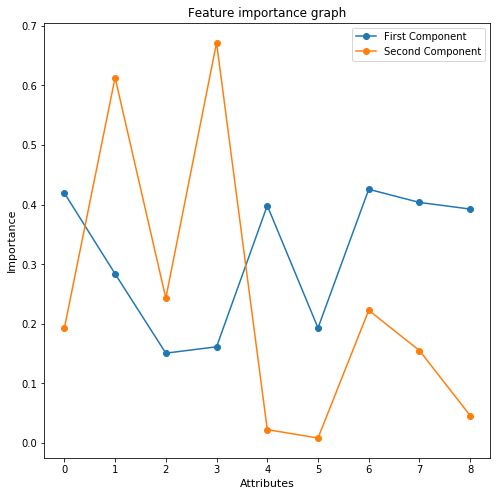

In [25]:
## plotting the above results
plt.figure(figsize=(8,8))
plt.plot(df4,'-o')
plt.title("Feature importance graph")
plt.xlabel("Attributes",fontsize=11)
plt.ylabel("Importance",fontsize=11)
plt.xticks(range(0,9))
plt.legend(['First Component','Second Component'])

<i>For first pca component attributes 'life_expec', 'total_fer', 'gdpp' , 'child_mort' are having high importance.<br>
For second pca component attributes 'exports' and 'imports' are having high importance</i>

In [26]:
## kmeans elbow method to find the best k value
from sklearn.cluster import KMeans
ks=range(1,9)
inertia=[]
for k in ks:
    model1=KMeans(n_clusters=k)
    model1.fit(x_pca)
    inertia.append(model1.inertia_)

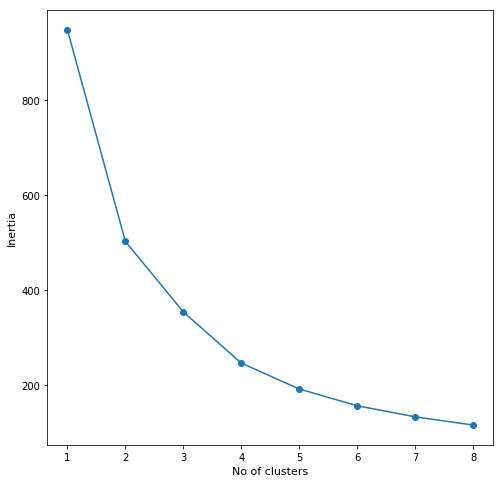

In [27]:
## plot to find the best k
plt.figure(figsize=(8,8))
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters',fontsize=11)
plt.ylabel('Inertia',fontsize=11)
plt.show()

<i><b>Taking 3 as optimum cluster</b></i>

In [28]:
## creating final model
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(x_pca)
result=model_kmeans.predict(x_pca)

In [29]:
result

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

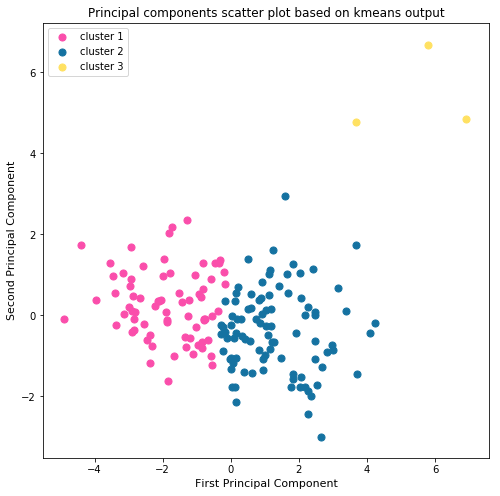

In [30]:
## plotting the graph
plt.figure(figsize=(8,8))
plt.title("Principal components scatter plot based on kmeans output")
plt.scatter(x_pca[result == 0,0],x_pca[result==0,1],c='#FA4EAB',s=50,label='cluster 1')
plt.scatter(x_pca[result == 1,0],x_pca[result==1,1],c='#1572A1',s=50,label='cluster 2')
plt.scatter(x_pca[result == 2,0],x_pca[result==2,1],c='#FFE162',s=50,label='cluster 3')
plt.xlabel('First Principal Component',fontsize=11)
plt.ylabel('Second Principal Component',fontsize=11)
plt.legend()
plt.show()

<b>Using aggomerative clustering</b>

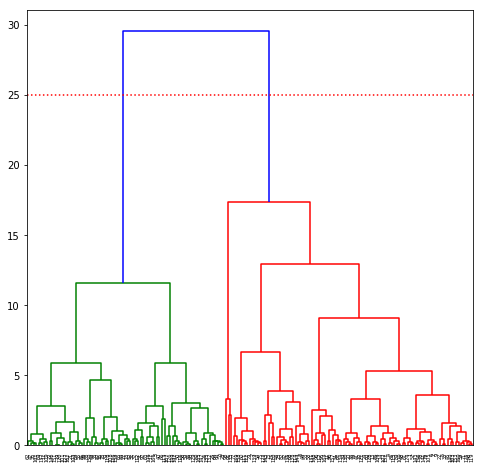

In [31]:
## calculating the number of clusters using dendrogram
import scipy.cluster.hierarchy as  sch
plt.figure(figsize=(8,8))
dendrogram2=sch.dendrogram(sch.linkage(x_pca,method='ward'),orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(25,0,5000,color='r',linestyle='dotted')
plt.show()

<b><i>Optimum clusters = 2</i></b>

In [32]:
## creating model
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)

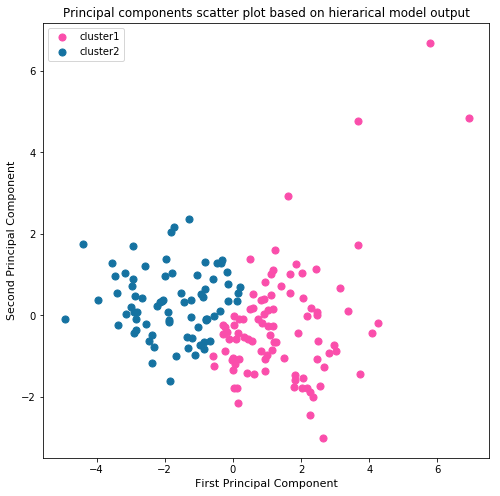

In [33]:
## graph between the two principal components based on agglomerative clustering output
plt.figure(figsize=(8,8))
plt.title("Principal components scatter plot based on hierarical model output")
plt.scatter(x_pca[y_hc == 0,0],x_pca[y_hc==0,1],c='#FA4EAB',s=50,label='cluster1')
plt.scatter(x_pca[y_hc == 1,0],x_pca[y_hc==1,1],c='#1572A1',s=50,label='cluster2')
plt.xlabel('First Principal Component',fontsize=11)
plt.ylabel('Second Principal Component',fontsize=11)
plt.legend()
plt.show()

##### Based on output of agglomerative clustering

In [34]:
## storing the labels of hierarchical clustering, i.e outputs
a=hc.labels_

In [35]:
type(a)

numpy.ndarray

In [36]:
## converting to list then appending the list to the dataframe
df1['result']=a.tolist()

In [37]:
df1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


<b>cluster 0 = rich countries <br>
cluster 1 = poor countries</b>

In [38]:
## top 10 countries who needed finacial help
df1[df1['result']==1].sort_values(by=['income','exports','gdpp'],ascending=True).reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result
0,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
1,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
2,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
3,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
4,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
5,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
6,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
7,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1
8,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1
9,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1


In [39]:
## top 10 countries who needed medical help 
df1[df1['result']==1].sort_values(by=['health','life_expec','total_fer'],ascending=True).reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result
0,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,1
1,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040,1
2,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740,1
3,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,1
4,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110,1
5,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482,1
6,Angola,119.0,62.300,2.85,42.9000,5900,22.40,60.1,6.16,3530,1
7,Gabon,63.7,57.700,3.50,18.9000,15400,16.60,62.9,4.08,8750,1
8,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,1
9,Philippines,31.9,34.800,3.61,36.6000,5600,4.22,69.0,3.16,2130,1


In [40]:
## top 10 countries who have high child mortality
df1[df1['result']==1].sort_values(by=['child_mort'],ascending=False).reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result
0,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1
2,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
4,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1
5,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1
6,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1
7,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
8,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1
9,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1


In [41]:
## assigning top 10 countries
top=df1[df1['result']==1].sort_values(by=['income','exports','gdpp'],ascending=True).reset_index(drop=True).head(10)

In [42]:
top['country'].head()

0            Congo, Dem. Rep.
1                     Liberia
2                     Burundi
3                       Niger
4    Central African Republic
Name: country, dtype: object

In [43]:
## converting country column to lattitude and longitude
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# declare an empty list to store
# latitude and longitude of values
# of city column
longitude = []
latitude = []

# function to find the coordinate
# of a given city
def findGeocode(city):

# try and catch is used to overcome
# the exception thrown by geolocator
# using geocodertimedout
    try:
# Specify the user_agent as your
# app name it should not be none
        geolocator = Nominatim(user_agent="abc")
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        return findGeocode(city)

# each value from country column
# will be fetched and sent to
# function find_geocode
for i in (top["country"]):
    if findGeocode(i) != None:
        loc = findGeocode(i)
# coordinates returned from
# function is stored into
# two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)

# if coordinate for a country not
# found, insert "NaN" indicating
# missing value
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)


In [44]:
## appending the lattitude column
top['lattitude']=latitude

In [45]:
## appending longitude column
top['longitude']=longitude

In [46]:
top

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result,lattitude,longitude
0,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,NaN,NaN
1,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,5.749972,-9.365852
2,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,-3.426449,29.932452
3,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,17.735621,9.323843
4,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,7.032360,19.998123
5,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,-19.302233,34.914498
6,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1,-13.268720,33.930196
7,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1,10.722623,-10.708359
8,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1,8.780026,1.019977
9,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,8.640035,-11.840027


In [47]:
## dropping any null rows
top2 = top.dropna(how='any',axis=0) 

In [48]:
import folium

In [49]:
wmap=folium.Map(tiles='cartodbpositron',zoom_start= 10)

In [50]:
location = []

In [51]:
## to access each rows
## index must be there, if not used it shows an error as we cannot use i['string'] in iteration, it must be like i[0].
for index, i in top2.iterrows():
    location=[i['lattitude'], i['longitude']]
    folium.Marker(location).add_to(wmap)

In [52]:
wmap

<i>All the financial help needed countries are in Africa.</i><br>

##### Based on kmeans

In [53]:
## getting the output
b=model_kmeans.labels_
df1['result2']=b.tolist()

<b>Cluster 0 = Finacially poor countries<br>
Cluster 1 = Mid-level financially rich country<br>
Cluster 2 = Financially rich countries</b>

In [69]:
## top 10 countries who needed finacial help
df1[df1['result2']==0].sort_values(by=['income','exports','gdpp'],ascending=True).reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result,result2
0,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,0
1,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,0
2,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,0
3,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,0
4,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,0
5,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,0
6,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1,0
7,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1,0
8,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1,0
9,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,0


In [55]:
## top 10 countries who needed medical help 
df1[df1['result2']==0].sort_values(by=['health','life_expec','total_fer'],ascending=True).reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result,result2
0,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,1,0
1,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040,1,0
2,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740,1,0
3,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,1,0
4,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110,1,0
5,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482,1,0
6,Angola,119.0,62.300,2.85,42.9000,5900,22.40,60.1,6.16,3530,1,0
7,Sri Lanka,11.2,19.600,2.94,26.8000,8560,22.80,74.4,2.20,2810,0,0
8,Gabon,63.7,57.700,3.50,18.9000,15400,16.60,62.9,4.08,8750,1,0
9,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,1,0


In [56]:
## top 10 countries who have high child mortality
df1[df1['result2']==0].sort_values(by=['child_mort'],ascending=False).reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,result,result2
0,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,0
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0
2,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1,0
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
4,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1,0
5,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1,0
6,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,0
7,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
8,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1,0
9,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,0


In [57]:
top_kmeans=df1[df1['result2']==0].sort_values(by=['income','exports','gdpp'],ascending=True).reset_index(drop=True).head(10)

In [58]:
longitude = []
latitude = []

for i in (top_kmeans["country"]):
    if findGeocode(i) != None:
        loc = findGeocode(i)
# coordinates returned from
# function is stored into
# two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)

# if coordinate for a city not
# found, insert "NaN" indicating
# missing value
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [59]:
top_kmeans['lattitude']=latitude
top_kmeans['longitude']=longitude

In [60]:
top_kmeans2 = top_kmeans.dropna(how='any',axis=0)

In [61]:
wmap2=folium.Map(tiles='cartodbpositron',zoom_start= 10)

In [62]:
location = []
## to access each rows
## index must be there, if not used it shows an error as we cannot use i['string'] in iteration, it must be like i[0].
for index, i in top_kmeans2.iterrows():
    location=[i['lattitude'], i['longitude']]
    folium.Marker(location).add_to(wmap2)
wmap2

<i>All the financial help needed countries are in Africa</i>

In [63]:
top_kmeans3=df1[df1['result2']==0].sort_values(by=['health','life_expec','total_fer'],ascending=True).reset_index(drop=True).head(10)

In [64]:
longitude = []
latitude = []

for i in (top_kmeans3["country"]):
    if findGeocode(i) != None:
        loc = findGeocode(i)
# coordinates returned from
# function is stored into
# two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)

# if coordinate for a city not
# found, insert "NaN" indicating
# missing value
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [65]:
top_kmeans3['lattitude']=latitude
top_kmeans3['longitude']=longitude

In [66]:
top_kmeans4 = top_kmeans3.dropna(how='any',axis=0)

In [67]:
wmap3=folium.Map(tiles='cartodbpositron',zoom_start= 10)

In [68]:
location = []
## to access each rows
## index must be there, if not used it shows an error as we cannot use i['string'] in iteration, it must be like i[0].
for index, i in top_kmeans4.iterrows():
    location=[i['lattitude'], i['longitude']]
    folium.Marker(location).add_to(wmap3)
wmap3

<i>Medical help needed countries are in Africa and Asia.</i>

<h6><i>So from both the models we can say that African countries like 'Congo, Dem. Rep.', 'Niger', 'Angola', etc are required both financial and medical help.</i></h6>